## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 2 


*****
Assignment 2 is worth 10% of the final grade. Submit the ipynb file and the generated pdf output file. Failing to submit both files will be subject to a mark deduction.
*****



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1. 

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [7]:
# INSERT YOUR ANSWER HERE 
url="https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
dataset=pd.read_csv(url)
dataset.head(10)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [13]:
# INSERT YOUR ANSWER HERE
#using dataset standard queries and then using shape[0] that describe the numbers of rows of the dataframe
print( "Number of records: ", dataset[(dataset['area']>0) & (dataset['rain']> 0) ].shape[0] )

Number of records:  2


# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [15]:
# INSERT YOUR ANSWER HERE

#creation of the filter first 
area_gt_zero = (dataset['area'] > 0 )

#using pandas loc showing the filtered dataframe with only 3 columns month, day, area
dataset.loc[area_gt_zero, ['month', 'day','area']]



,month,day,area
138,jul,tue,0.36
139,sep,tue,0.43
140,sep,mon,0.47
141,aug,wed,0.55
142,aug,fri,0.61
...,...,...,...
509,aug,fri,2.17
510,aug,fri,0.43
512,aug,sun,6.44
513,aug,sun,54.29


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [7]:
# INSERT YOUR ANSWER HERE
dataset.sort_values(by=['area'], ascending=False).head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94


# Q5. 
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [8]:
# INSERT YOUR ANSWER HERE
dataset[['month', 'temp','RH','wind','rain','area']].sort_values(by=['area'], ascending=False).head(5)

,month,temp,RH,wind,rain,area
238,sep,25.1,27,4.0,0.0,1090.84
415,aug,27.5,27,4.9,0.0,746.28
479,jul,22.6,57,4.9,0.0,278.53
237,sep,18.8,40,2.2,0.0,212.88
236,sep,18.2,46,1.8,0.0,200.94


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [9]:
# INSERT YOUR ANSWER HERE

months_in_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

dataset.month = pd.Categorical(
    dataset.month,
    categories=months_in_order,
    ordered=True
)

dataset.sort_values('month', inplace=True)

dataset.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
76,9,9,feb,fri,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,0.00
75,9,9,feb,thu,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00
182,5,4,feb,sun,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
284,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24
130,4,6,feb,sat,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00


# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [10]:
# INSERT YOUR ANSWER HERE
dataset['FireYN'] = np.where(dataset['area']>0, True, False)

dataset.head(20)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,FireYN
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,False
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,False
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,False
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,False
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,True
76,9,9,feb,fri,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,0.00,False
75,9,9,feb,thu,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00,False
182,5,4,feb,sun,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38,True
284,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24,True
130,4,6,feb,sat,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00,False


# 8. 
What is the mean area/wind/temp/RH per month? (10 points)

In [36]:
# INSERT YOUR ANSWER HERE
months_in_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#Definition of the list to calculate "array" for each month
value=[]
#Definition of the data frame using pandas with definition of the index
means_df = pd.DataFrame(index=['area','wind','temp','RH']);

# looping for each of the month
for val in months_in_order:
    value= [ 
                dataset.loc[dataset['month'] == val, 'area'].mean(),
                dataset.loc[dataset['month'] == val, 'wind'].mean(),
                dataset.loc[dataset['month'] == val, 'temp'].mean(),
                dataset.loc[dataset['month'] == val, 'RH'].mean() 
           ]
    #each interaction adds a new column
    means_df[val] = value
    
#after finishing the loop the medias have been krafted using the dataframe means_df
print( means_df)




        jan     feb        mar        apr    may        jun        jul  \
area   0.00   6.275   4.356667   8.891111  19.24   5.841176  14.369687   
wind   2.00   3.755   4.968519   4.666667   4.45   4.135294   3.734375   
temp   5.25   9.635  13.083333  12.044444  14.65  20.494118  22.109375   
RH    89.00  55.700  40.000000  46.888889  67.00  45.117647  45.125000   

            aug        sep        oct   nov        dec  
area  12.489076  17.942616   6.638000   0.0  13.330000  
wind   4.086413   3.557558   3.460000   4.5   7.644444  
temp  21.631522  19.612209  17.093333  11.8   4.522222  
RH    45.489130  42.843023  37.466667  31.0  38.444444  


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

     count
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1


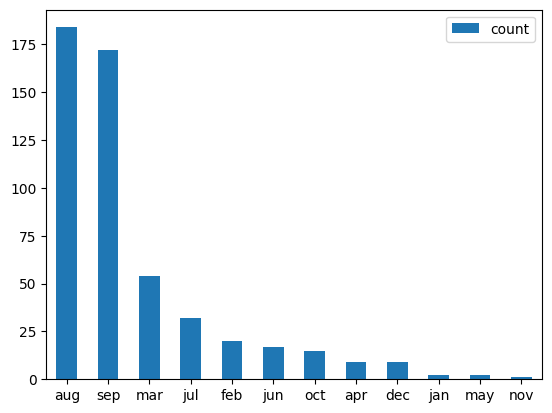

In [54]:
# INSERT YOUR ANSWER HERE

#Definition of the data frame using pandas with definition of the index
count_df = pd.DataFrame();

#order and calculation in one line using "value_counts" then push the result in dataframe count_df
count_df["count"] = dataset['month'].value_counts()

#creation of the barplot using pandas
ax = count_df.plot.bar(rot=0)

#just in case printing the calculated dataframe 
print( count_df )



# Q10. 
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

month
aug      99
sep      97
mar      19
jul      18
feb      10
dec       9
jun       8
oct       5
apr       4
may       1
jan       0
nov       0
dtype: int64


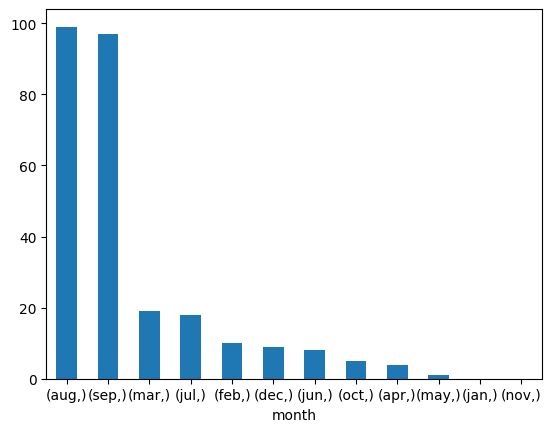

In [73]:
# INSERT YOU ANSWER HERE

#Definition of the data frame using pandas with definition of the index
burned_area_df = pd.DataFrame();

#order and calculation in one line using value counts then push the result in dataframe burned_area_df
#becoming familiar with basic selection, filter and counting series with value_counts 
burned_area_df = dataset[dataset['area']>0].filter(items=['month']).value_counts()

#creation of the barplot using pandas
ax = burned_area_df.plot.bar(rot=0)

#just in case printing the calculated dataframe
print( burned_area_df )




This is the end of Assignment 2

Ceni Babaoglu, PhD